In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Walker2d-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(26362, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(29162, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,01-06-2023 18:23:19,67,0,67,0.003330,1,68,True,-0.696641,-0.696641,-0.696641,-0.696641,-0.696641,COMPER
1,1,2,Walker2d-v4,01-06-2023 18:24:03,85,0,85,0.004225,2,19,True,-10.148163,-5.422402,-5.422402,-5.422402,-5.422402,COMPER
2,1,3,Walker2d-v4,01-06-2023 18:24:32,97,0,97,0.004821,3,13,True,-11.850716,-7.565173,-7.565173,-7.565173,-7.565173,COMPER
3,1,4,Walker2d-v4,01-06-2023 18:25:00,109,0,109,0.005418,4,13,True,-12.401864,-8.774346,-8.774346,-8.774346,-8.774346,COMPER
4,1,5,Walker2d-v4,01-06-2023 18:25:27,120,0,120,0.005964,5,12,True,-13.471200,-9.713717,-9.713717,-9.713717,-9.713717,COMPER
5,1,6,Walker2d-v4,01-06-2023 18:25:54,132,0,132,0.006561,6,13,True,-16.513412,-10.846999,-10.846999,-10.846999,-10.846999,COMPER
6,1,7,Walker2d-v4,01-06-2023 18:26:19,143,0,143,0.007108,7,12,True,-15.791727,-11.553389,-11.553389,-11.553389,-11.553389,COMPER
7,1,8,Walker2d-v4,01-06-2023 18:26:48,155,0,155,0.007704,8,13,True,-16.166540,-12.130033,-12.130033,-12.130033,-12.130033,COMPER
8,1,9,Walker2d-v4,01-06-2023 18:27:19,167,0,167,0.008301,9,13,True,-16.035346,-12.563957,-12.563957,-12.563957,-12.563957,COMPER
9,1,10,Walker2d-v4,01-06-2023 18:27:46,178,0,178,0.008847,10,12,True,-17.017600,-13.009321,-13.009321,-13.009321,-13.009321,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,12-06-2023 21:44:27,43,44,0,0.002137,1,44,True,20.489365,20.489365,20.489365,20.489365,20.489365,DDPG
1,1,2,Walker2d-v4,12-06-2023 21:44:28,56,57,0,0.002783,2,14,True,-8.413935,6.037715,6.037715,6.037715,6.037715,DDPG
2,1,3,Walker2d-v4,12-06-2023 21:44:29,72,73,0,0.003579,3,17,True,-2.592202,3.161076,3.161076,3.161076,3.161076,DDPG
3,1,4,Walker2d-v4,12-06-2023 21:44:40,200,201,0,0.009941,4,129,False,100.511079,27.498577,27.498577,27.498577,27.498577,DDPG
4,1,5,Walker2d-v4,12-06-2023 21:44:45,260,261,0,0.012923,4,189,True,76.148381,37.228538,37.228538,37.228538,37.228538,DDPG
5,1,6,Walker2d-v4,12-06-2023 21:44:58,400,401,0,0.019882,5,141,False,201.438489,64.596863,64.596863,64.596863,64.596863,DDPG
6,1,7,Walker2d-v4,12-06-2023 21:45:00,434,435,0,0.021572,5,175,True,299.019540,98.085817,98.085817,98.085817,98.085817,DDPG
7,1,8,Walker2d-v4,12-06-2023 21:45:14,590,591,0,0.029325,6,157,True,276.312077,120.364099,120.364099,120.364099,120.364099,DDPG
8,1,9,Walker2d-v4,12-06-2023 21:45:15,600,601,0,0.029822,7,11,False,10.098484,108.112364,108.112364,108.112364,108.112364,DDPG
9,1,10,Walker2d-v4,12-06-2023 21:45:28,759,760,0,0.037725,7,170,True,291.543178,126.455446,126.455446,126.455446,126.455446,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Walker2d-v4,01-06-2023 18:23:19,67,0,67,0.003330,1,68,True,-0.696641,-0.696641,-0.696641,-0.696641,-0.696641,COMPER
1,1,2,Walker2d-v4,01-06-2023 18:24:03,85,0,85,0.004225,2,19,True,-10.148163,-5.422402,-5.422402,-5.422402,-5.422402,COMPER
2,1,3,Walker2d-v4,01-06-2023 18:24:32,97,0,97,0.004821,3,13,True,-11.850716,-7.565173,-7.565173,-7.565173,-7.565173,COMPER
3,1,4,Walker2d-v4,01-06-2023 18:25:00,109,0,109,0.005418,4,13,True,-12.401864,-8.774346,-8.774346,-8.774346,-8.774346,COMPER
4,1,5,Walker2d-v4,01-06-2023 18:25:27,120,0,120,0.005964,5,12,True,-13.471200,-9.713717,-9.713717,-9.713717,-9.713717,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
4168,5,4169,Walker2d-v4,13-06-2023 05:36:13,49963,49964,0,0.999,3939,12,True,-5.928349,-4.640235,-4.417625,-5.500409,-6.052621,DDPG
4169,5,4170,Walker2d-v4,13-06-2023 05:36:15,49974,49975,0,0.999,3940,12,True,-5.681033,-4.640484,-4.447071,-5.495938,-6.018443,DDPG
4170,5,4171,Walker2d-v4,13-06-2023 05:36:17,49988,49989,0,0.999,3941,15,True,-4.581379,-4.640470,-4.478140,-5.473062,-5.839307,DDPG
4171,5,4172,Walker2d-v4,13-06-2023 05:36:18,50000,50001,0,0.999,3942,13,True,-3.626848,-4.640227,-4.489374,-5.429436,-5.596656,DDPG
4172,5,4173,Walker2d-v4,13-06-2023 05:36:19,50001,50002,0,0.999,3943,2,True,0.806235,-4.638922,-4.463143,-5.314883,-4.890783,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

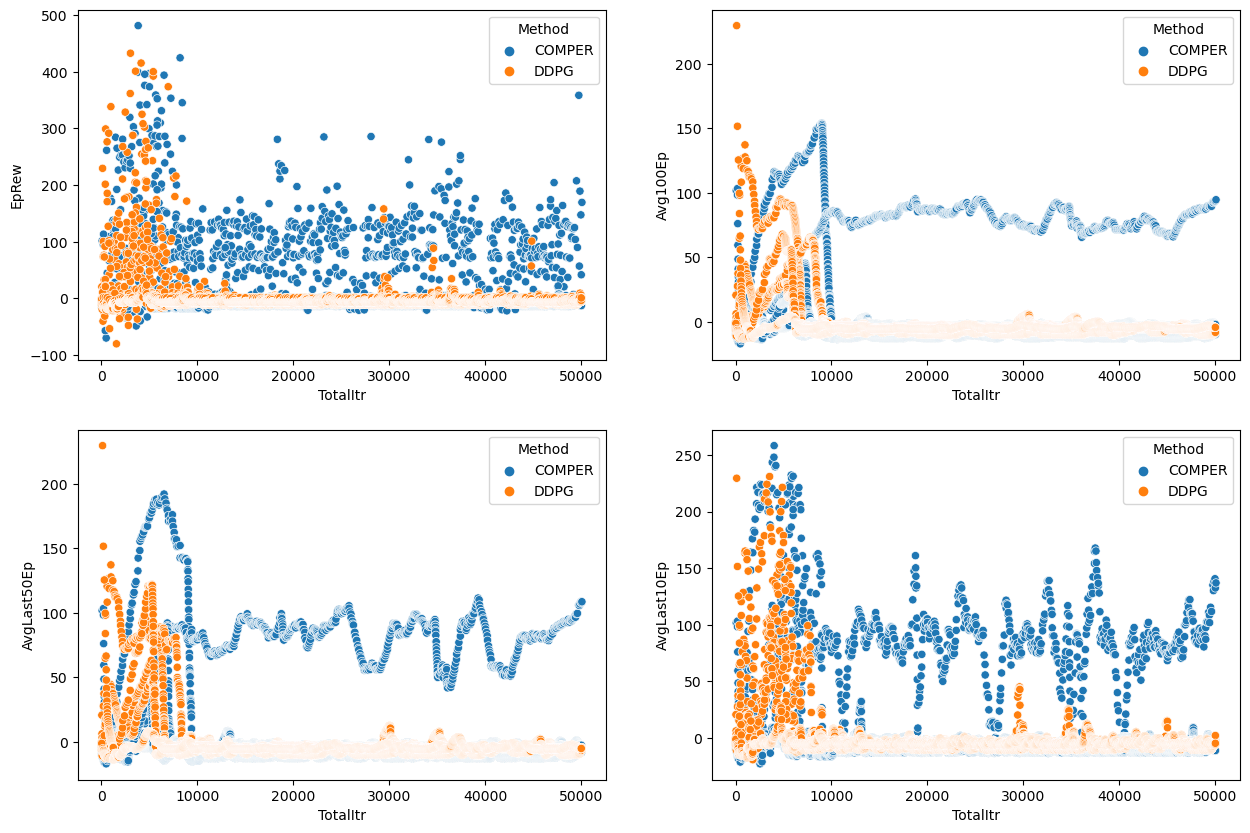

In [12]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

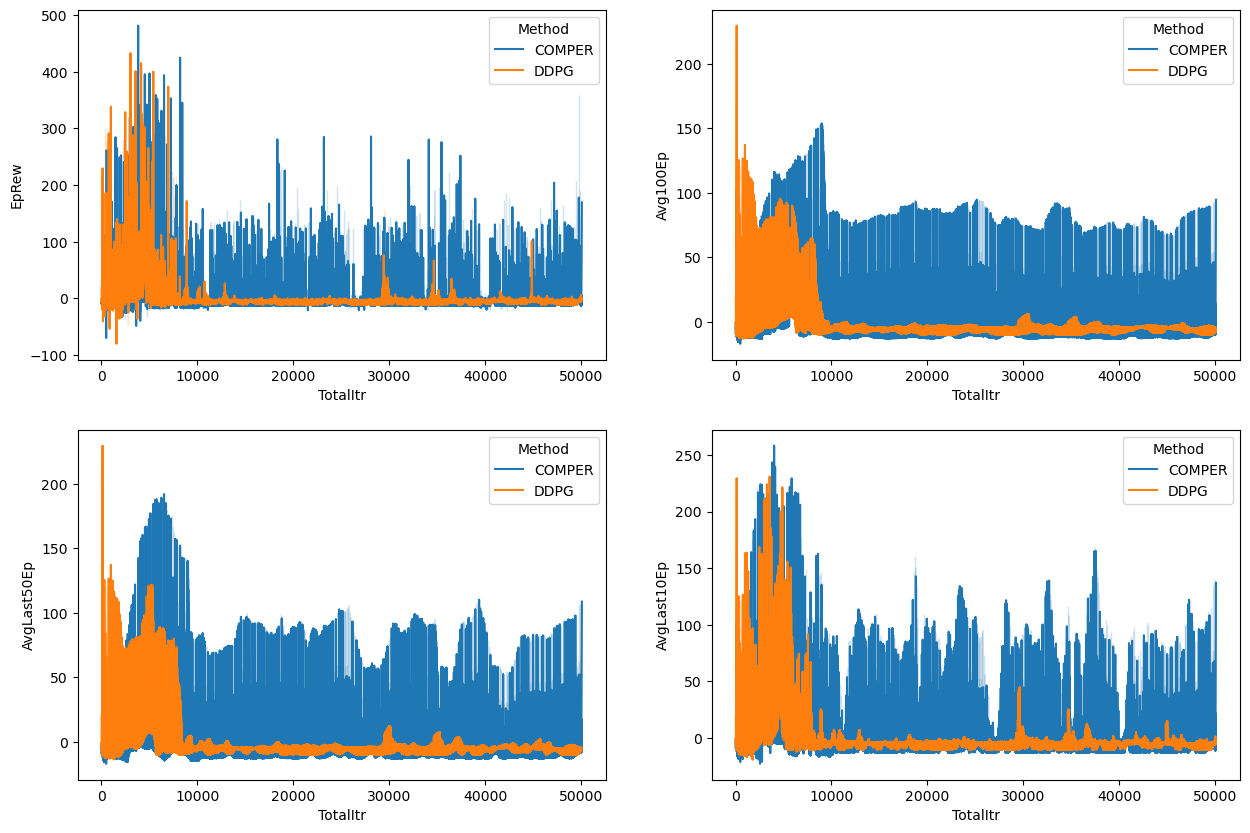

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [4]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,01-06-2023 21:56:23,Walker2d-v4,5000,5.461533,COMPER
1,1,02-06-2023 01:39:43,Walker2d-v4,10000,-2.291599,COMPER
2,1,02-06-2023 05:21:50,Walker2d-v4,15000,-5.181290,COMPER
3,1,02-06-2023 09:00:02,Walker2d-v4,20000,-5.176556,COMPER
4,1,02-06-2023 12:41:58,Walker2d-v4,25000,-5.153623,COMPER


In [5]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-1.132773
std,1.428571,14507.211437,2.797559
min,1.000000,5000.000000,-5.222343
25%,2.000000,15000.000000,-2.200718
50%,3.000000,27500.000000,-2.077849
75%,4.000000,40000.000000,1.750401
max,5.000000,50000.000000,6.110718


In [6]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,12-06-2023 21:51:35,Walker2d-v4,5000,6.141744,DDPG
1,1,12-06-2023 21:59:13,Walker2d-v4,10000,-2.159604,DDPG
2,1,12-06-2023 22:07:18,Walker2d-v4,15000,-2.035423,DDPG
3,1,12-06-2023 22:15:52,Walker2d-v4,20000,-2.051537,DDPG
4,1,12-06-2023 22:24:56,Walker2d-v4,25000,-2.080868,DDPG


In [7]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-1.650243
std,1.428571,14507.211437,2.361209
min,1.000000,5000.000000,-3.691144
25%,2.000000,15000.000000,-2.192611
50%,3.000000,27500.000000,-2.073274
75%,4.000000,40000.000000,-1.948403
max,5.000000,50000.000000,6.225030


In [8]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

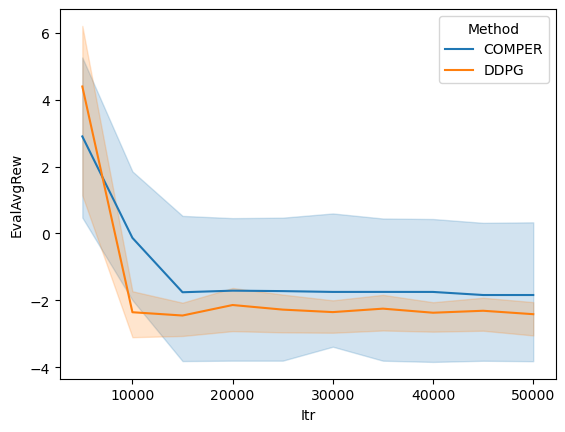

In [9]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')